In [7]:
import numpy as np
import pandas as pd
import os
import pathlib
import scanpy as sc
from anndata import AnnData
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
path_test_csv = '/home/matthieu.bernard/Documents/IF_to_IMC/data/true_data/morphology/IMC_morphology/test/Ir191_seg.txt'

In [ ]:
df = pd.read_csv(path_test_csv,sep='\t')

# Get rid of useless columns
df = df.drop(columns=['Image','Object ID', 'Object type', 'Name', 'Classification', 'Parent', 'ROI'])

def is_nucleus_col(col):
    pass

for col in df.columns:
    print(col)
    if re.split('r[:]',col)[0] != 'Nucleus':
        #df=df.drop(columns=[col])
        pass


df.columns

Centroid X µm
Centroid Y µm
Nucleus: Area µm^2
Nucleus: Length µm
Nucleus: Circularity
Nucleus: Solidity
Nucleus: Max diameter µm
Nucleus: Min diameter µm
Cell: Area µm^2
Cell: Length µm
Cell: Circularity
Cell: Solidity
Cell: Max diameter µm
Cell: Min diameter µm
Nucleus/Cell area ratio
Nucleus: Channel 1: Mean
Nucleus: Channel 1: Median
Nucleus: Channel 1: Min
Nucleus: Channel 1: Max
Nucleus: Channel 1: Std.Dev.
Cytoplasm: Channel 1: Mean
Cytoplasm: Channel 1: Median
Cytoplasm: Channel 1: Min
Cytoplasm: Channel 1: Max
Cytoplasm: Channel 1: Std.Dev.
Membrane: Channel 1: Mean
Membrane: Channel 1: Median
Membrane: Channel 1: Min
Membrane: Channel 1: Max
Membrane: Channel 1: Std.Dev.
Cell: Channel 1: Mean
Cell: Channel 1: Median
Cell: Channel 1: Min
Cell: Channel 1: Max
Cell: Channel 1: Std.Dev.


Index([], dtype='object')

In [31]:
import scanpy as sc

# Load or read your AnnData object
adata = AnnData(df) # Example dataset

# Preprocessing (standard steps)

adata

/home/matthieu.bernard/miniconda3/envs/env/lib/python3.13/site-packages/anndata/utils.py:311: UserWarning: X converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")
/home/matthieu.bernard/miniconda3/envs/env/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 16284 × 14

(array([3.360e+02, 1.025e+03, 1.967e+03, 2.715e+03, 2.232e+03, 1.691e+03,
        1.248e+03, 1.000e+03, 8.910e+02, 7.000e+02, 5.050e+02, 3.960e+02,
        3.160e+02, 2.530e+02, 2.000e+02, 1.530e+02, 1.200e+02, 8.500e+01,
        7.200e+01, 5.900e+01, 5.000e+01, 3.800e+01, 2.600e+01, 3.500e+01,
        2.100e+01, 2.400e+01, 9.000e+00, 1.900e+01, 9.000e+00, 1.300e+01,
        7.000e+00, 9.000e+00, 7.000e+00, 7.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

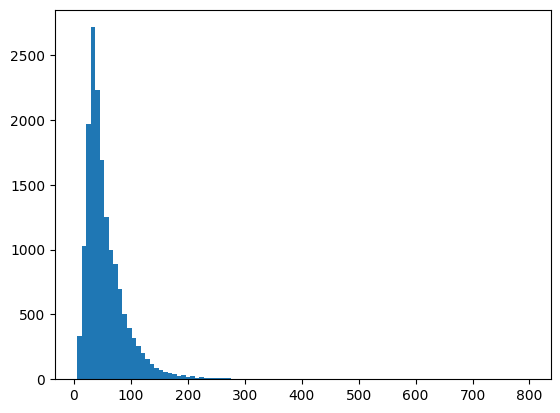

In [36]:
plt.hist(df['Nucleus: Area'], bins=100)

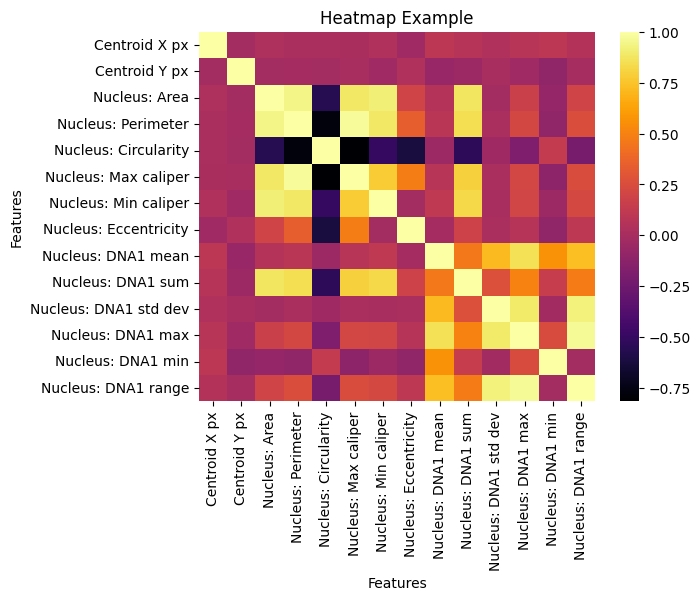

In [35]:
corr = df.corr()
sns.heatmap(corr, cmap='inferno', annot=False    )
plt.title("Heatmap Example")
plt.xlabel("Features")
plt.ylabel("Features")
#plt.tight_layout()
plt.show()

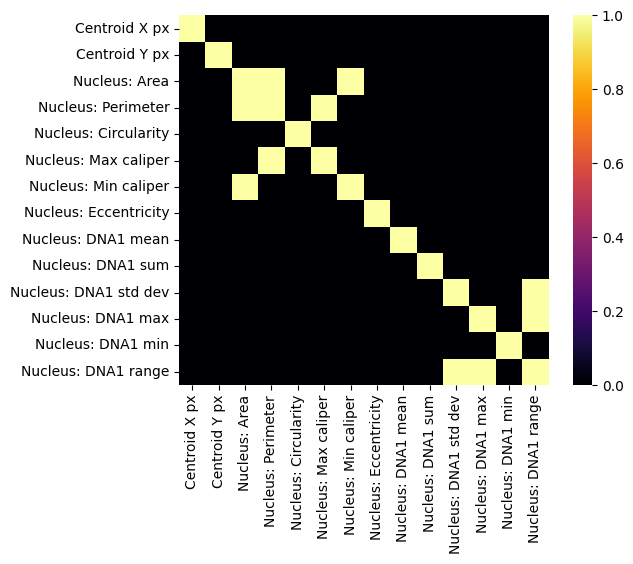

In [38]:
threshold = 0.90
mask = corr > threshold
ax = sns.heatmap(mask, cmap='inferno', annot=False, cbar=True, square=True)
plt.show()


In [7]:
sc.tl.pca(adata, n_comps=11)
adata

AnnData object with n_obs × n_vars = 17094 × 12
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [8]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.scale(adata)

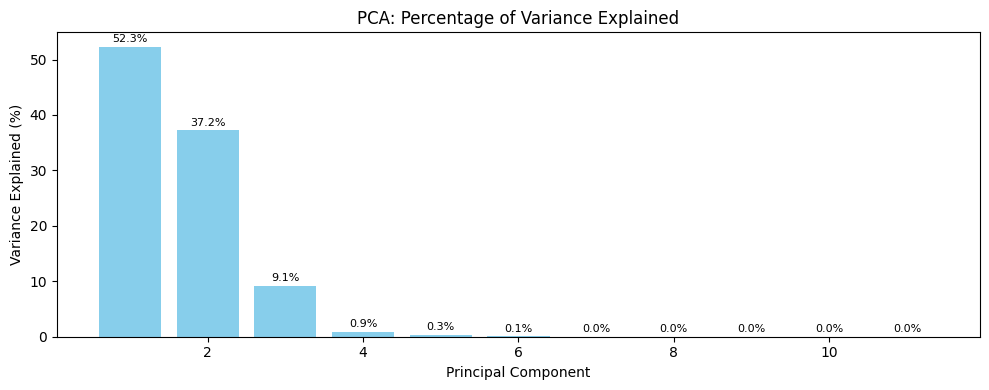

In [9]:
explained = adata.uns['pca']['variance_ratio']

plt.figure(figsize=(10, 4))
plt.bar(range(1, len(explained)+1), explained * 100, color='skyblue')
for i, v in enumerate(explained):
    plt.text(i + 1, 100*v + 0.5, f"{100*v:.1f}%", ha='center', va='bottom', fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('PCA: Percentage of Variance Explained')
plt.tight_layout()
plt.show()

In [10]:
loadings = adata.varm['PCs']
loading_df = pd.DataFrame(
    loadings,
    index=adata.var_names,
    columns=[f'PC{i+1}' for i in range(loadings.shape[1])]
)

loading_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Cell: Area,0.745214,-0.648412,0.001136,0.026908,0.012444,-0.145218,0.001981,-0.007966,-0.046582,-0.002769,-0.001885
Cell: Perimeter,0.109071,-0.087073,0.007789,0.004212,-0.001529,0.847393,0.019773,0.115292,0.312257,-0.351375,0.165606
Cell: Circularity,-0.000304,-0.000013,-0.000561,-0.000151,0.004024,-0.021023,0.016068,0.020892,0.006337,0.189595,0.389187
Cell: Max caliper,0.040232,-0.031499,0.005199,0.004000,0.004340,0.466724,0.057097,0.175765,-0.423510,0.671236,-0.339445
Cell: Min caliper,0.024996,-0.020962,-0.002512,-0.003813,-0.000901,-0.043857,-0.052051,-0.146286,0.825353,0.516799,-0.149742
Cell: Eccentricity,0.000177,-0.000092,0.000508,0.001919,0.008885,0.011318,0.042904,0.063002,-0.078475,0.348598,0.824842
Cell: DNA1 mean,0.123177,0.165221,0.273899,0.732698,0.208963,0.101354,-0.266575,-0.458897,-0.094655,0.018992,0.027405
Cell: DNA1 std dev,0.122756,0.171554,-0.023909,0.092705,0.808720,-0.108333,0.058423,0.515498,0.099549,-0.022642,-0.031539
Cell: DNA1 max,0.590669,0.670749,-0.390156,-0.079663,-0.198391,0.008157,0.013429,-0.053615,-0.011752,0.002499,0.003632
Cytoplasm: DNA1 mean,0.036422,0.067171,0.238873,0.487202,-0.511001,-0.135618,0.052876,0.634553,0.117101,-0.016919,-0.027680


In [11]:
for i in range(1,12):
    top_morph_pc1 = loading_df['PC'+str(i)].abs().sort_values(ascending=False).head(7)
    print('\n[PC'+str(i)+']')
    print(top_morph_pc1, sep='')


[PC1]
Cell: Area             0.745214
Cell: DNA1 max         0.590669
Cytoplasm: DNA1 max    0.220163
Cell: DNA1 mean        0.123177
Cell: DNA1 std dev     0.122756
Cell: Perimeter        0.109071
Cell: Max caliper      0.040232
Name: PC1, dtype: float64

[PC2]
Cell: DNA1 max          0.670749
Cell: Area              0.648412
Cytoplasm: DNA1 max     0.237028
Cell: DNA1 std dev      0.171554
Cell: DNA1 mean         0.165221
Cell: Perimeter         0.087073
Cytoplasm: DNA1 mean    0.067171
Name: PC2, dtype: float64

[PC3]
Cytoplasm: DNA1 max        0.827193
Cell: DNA1 max             0.390156
Cell: DNA1 mean            0.273899
Cytoplasm: DNA1 mean       0.238873
Cytoplasm: DNA1 std dev    0.175447
Cell: DNA1 std dev         0.023909
Cell: Perimeter            0.007789
Name: PC3, dtype: float64

[PC4]
Cell: DNA1 mean            0.732698
Cytoplasm: DNA1 mean       0.487202
Cytoplasm: DNA1 max        0.443137
Cytoplasm: DNA1 std dev    0.117051
Cell: DNA1 std dev         0.092705
Cell: D

We can see that the most important morphology features in our dataset are :
-> Cell Area
-> Cell DNA1 max
-> Cytoplasm DNA1 max
-> Cytoplasm DNA1 mean
-> Cell DNA1 mean
-> Cell DNA1 std dev
-> Perimeter

We can thus get rid of all the other elements

In [12]:
df = df.drop(columns=['Cell: Circularity','Cell: Max caliper','Cell: Min caliper','Cell: Eccentricity','Cytoplasm: DNA1 std dev'])
df.head()

,Cell: Area,Cell: Perimeter,Cell: DNA1 mean,Cell: DNA1 std dev,Cell: DNA1 max,Cytoplasm: DNA1 mean,Cytoplasm: DNA1 max
0,-1.129713,-0.475379,0.834437,1.052181,-0.036154,0.269440,1.432817
1,0.162946,0.873464,-0.559078,-0.184453,0.358591,-0.608095,-0.816319
2,-0.379751,-0.240262,0.677997,0.800659,-0.277409,-0.033187,0.632644
3,1.093666,0.853910,-0.439880,-1.206066,-1.151430,-0.032995,-0.324648
4,-1.791607,-1.320224,1.279977,1.522077,0.336681,0.257982,2.348935


In [13]:
# Neighborhood graph
sc.pp.neighbors(adata, n_neighbors=5, n_pcs=3)

/home/matthieu.bernard/miniconda3/envs/env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
for spread in [1]:
    sc.tl.umap(adata,spread = spread, min_dist = 0.1)
    #sc.pl.umap(adata, title=f"spread={spread}")

In [15]:
sc.tl.leiden(adata, resolution=0.5)

/tmp/ipykernel_3700/1771924308.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


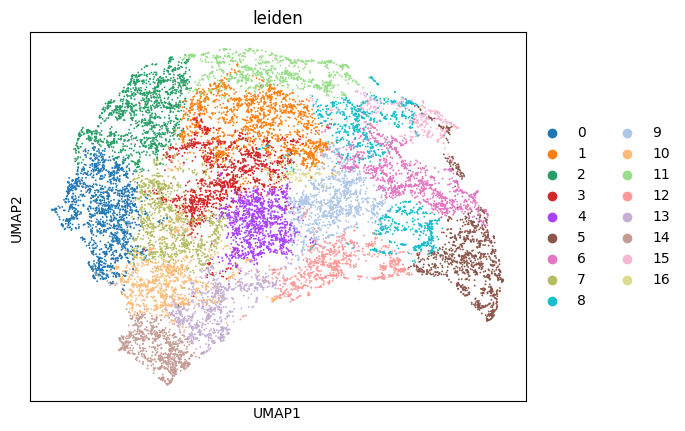

In [16]:
sc.pl.umap(adata, color='leiden')

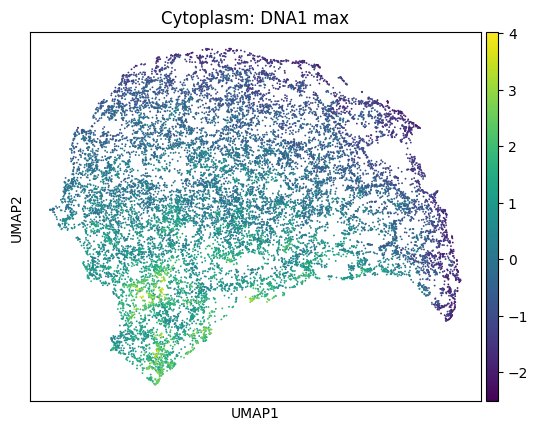

In [17]:
sc.pl.umap(adata, color='Cytoplasm: DNA1 max')

<h2>H&E morphology data

In [18]:
he_directory = '/home/matthieu.bernard/Documents/IF_to_IMC/data/true_data/morphology/HE_morphology'
path_he_csv = '/home/matthieu.bernard/Documents/IF_to_IMC/data/true_data/morphology/HE_morphology/15T011146-16_HE_morphology.txt'

In [ ]:
df_he = pd.read_csv(path_he_csv,sep='\t')

# Get rid of useless columns
df_he = df_he.drop(columns=['Image','Object ID', 'Object type', 'Name', 'Classification', 'Parent', 'ROI'])

df_he.head()

,Centroid X µm,Centroid Y µm,Nucleus: Area,Nucleus: Perimeter,Nucleus: Circularity,Nucleus: Max caliper,Nucleus: Min caliper,Nucleus: Eccentricity,Nucleus: Hematoxylin OD mean,Nucleus: Hematoxylin OD sum,...,Cell: Eosin OD min,Cytoplasm: Hematoxylin OD mean,Cytoplasm: Hematoxylin OD std dev,Cytoplasm: Hematoxylin OD max,Cytoplasm: Hematoxylin OD min,Cytoplasm: Eosin OD mean,Cytoplasm: Eosin OD std dev,Cytoplasm: Eosin OD max,Cytoplasm: Eosin OD min,Nucleus/Cell area ratio
0,14195.9,5856.4,21.50,17.4444,0.8878,6.1872,4.5233,0.6098,0.5884,51.7809,...,-0.0124,0.1801,0.0732,0.4613,0.0460,0.1285,0.0582,0.2812,0.0201,0.1616
1,14216.7,5857.2,32.75,30.5150,0.4420,9.1987,5.6952,0.8114,0.3730,48.8608,...,-0.0259,0.1717,0.0538,0.3360,0.0136,0.1539,0.0566,0.3391,0.0112,0.2402
2,14227.1,5855.7,12.00,15.1903,0.6535,5.5152,3.4440,0.8292,0.3608,19.1198,...,0.0236,0.1907,0.0459,0.3216,0.0570,0.1310,0.0394,0.1873,0.0236,0.1777
3,14284.7,5854.3,16.25,19.6857,0.5269,7.4388,3.8859,0.8697,0.4466,31.7092,...,0.0063,0.2046,0.0622,0.4933,0.0703,0.1329,0.0577,0.2999,0.0225,0.2370
4,14334.4,5854.6,8.75,14.0803,0.5546,5.7513,2.7367,0.9221,0.5056,20.7306,...,-0.0460,0.1917,0.1723,1.0208,0.0247,0.0725,0.0537,0.2622,-0.0105,0.1520


/home/matthieu.bernard/miniconda3/envs/env/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


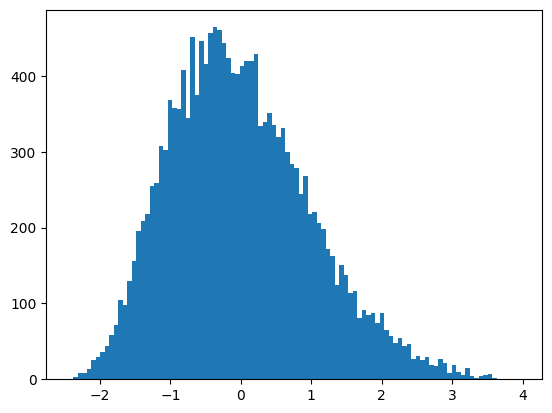

In [20]:
adata_he = AnnData(df_he) # Example dataset
plt.hist(df['Cell: Area'], bins=100)
plt.show()

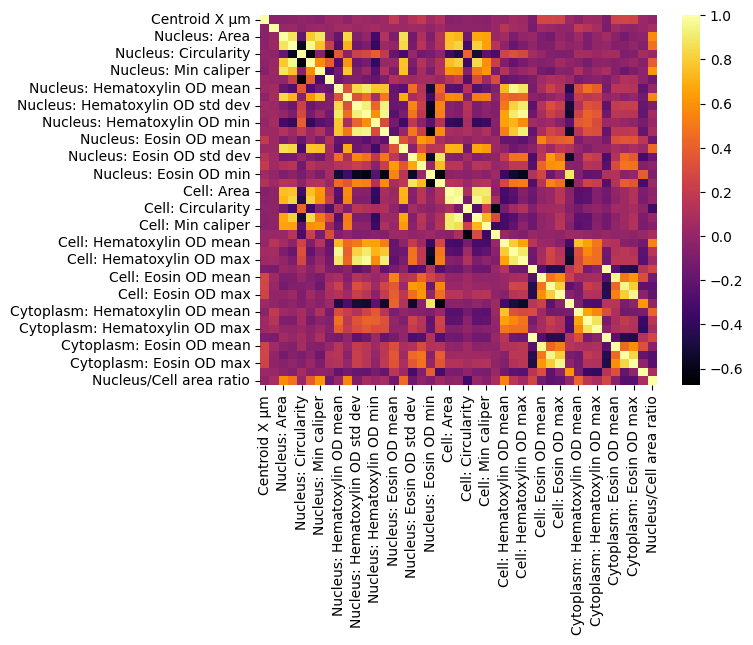

                                   Centroid X µm  Centroid Y µm  \
Centroid X µm                           1.000000      -0.045707   
Centroid Y µm                          -0.045707       1.000000   
Nucleus: Area                          -0.050215       0.018882   
Nucleus: Perimeter                     -0.035974       0.022938   
Nucleus: Circularity                   -0.019721      -0.029308   
Nucleus: Max caliper                   -0.026978       0.017195   
Nucleus: Min caliper                   -0.057768       0.023354   
Nucleus: Eccentricity                   0.025443       0.003087   
Nucleus: Hematoxylin OD mean            0.038655       0.053108   
Nucleus: Hematoxylin OD sum            -0.032266       0.059523   
Nucleus: Hematoxylin OD std dev         0.048236       0.019977   
Nucleus: Hematoxylin OD max             0.029872       0.047759   
Nucleus: Hematoxylin OD min             0.005677       0.066914   
Nucleus: Hematoxylin OD range           0.032892       0.03013

In [ ]:
corr_he = df_he.corr()
ax = sns.heatmap(corr_he, cmap='inferno', annot=False, )
plt.show()
df_he = df_he.drop(columns=[])

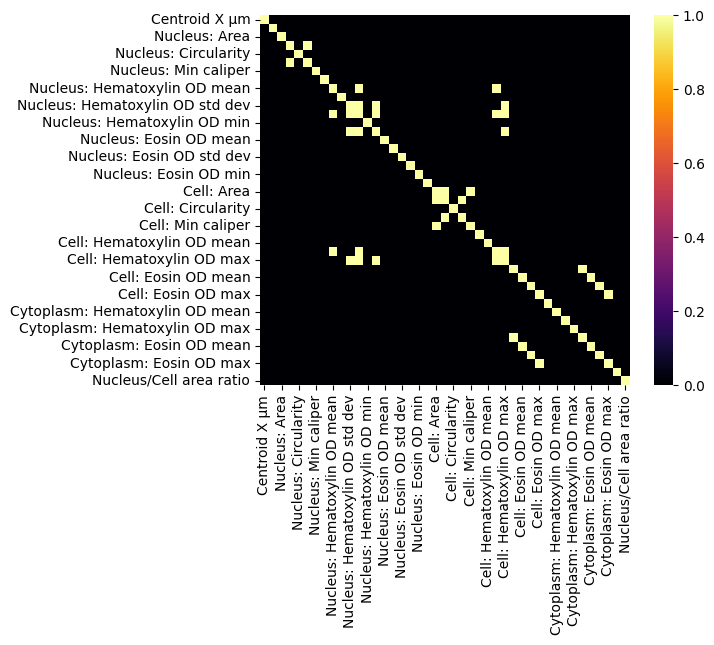

In [23]:
threshold = 0.90
mask = corr_he > threshold
ax = sns.heatmap(mask, cmap='inferno', annot=False, cbar=True, square=True)
plt.show()
